# different checks of stationarity...
###  Check if a data set or time series is random by Lag Plot

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from pandas import Series
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('../Data/imputedWQ.csv', parse_dates=True, header=0, index_col=0)

In [3]:
# create Series object
Tp = df['Tp']
Cl = df['Cl']
pH = df['pH']
Redox = df['Redox']
Leit = df['Leit']
Cl2 = df['Cl_2']
Fm = df['Fm']
Fm_2 = df['Fm_2']

/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  if __name__ == '__main__':
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  if sys.path[0] == '':
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  from ipykernel import kernelapp as app
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated

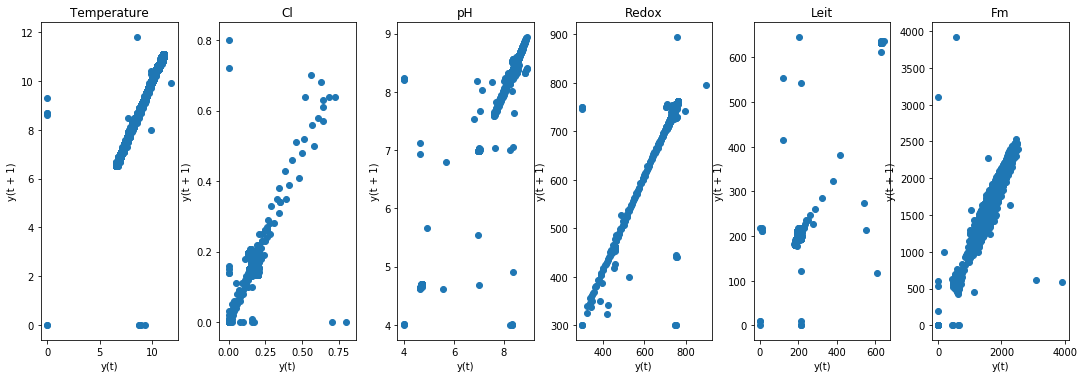

In [4]:
from pandas.tools.plotting import lag_plot

f2, (ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 6, figsize=(15, 5))
f2.tight_layout()

lag_plot(Tp, ax=ax4)
ax4.set_title('Temperature');

lag_plot(Cl, ax=ax5)
ax5.set_title('Cl');

lag_plot(pH, ax=ax6)
ax6.set_title('pH');

lag_plot(Redox, ax=ax7)
ax7.set_title('Redox');

lag_plot(Leit, ax=ax8)
ax8.set_title('Leit');

lag_plot(Fm, ax=ax9)
ax9.set_title('Fm');

plt.show()

We can not give a strong decision from the graphs in this case

#### Checking randomness in time series using auto-correlation plot of Pandas

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if sys.path[0] == '':
/home/syka/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app
/home/syka/anaconda2/envs/py3/lib/python3.6/site-

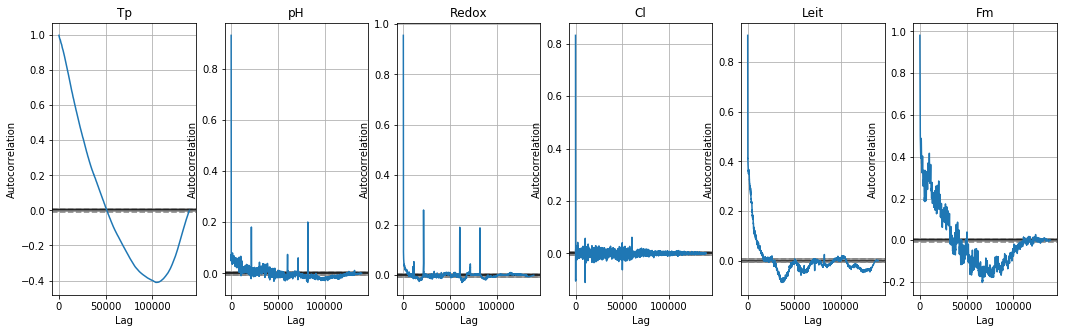

In [5]:
from pandas.tools.plotting import autocorrelation_plot

f3, (ax7, ax8, ax9, ax1,ax2,ax3) = plt.subplots(1, 6, figsize=(18, 5))
#f3.tight_layout()

autocorrelation_plot(Tp, ax=ax7)
ax7.set_title('Tp');

autocorrelation_plot(pH, ax=ax8)
ax8.set_title('pH');

autocorrelation_plot(Redox, ax=ax9)
ax9.set_title('Redox');

autocorrelation_plot(Cl, ax=ax1)
ax1.set_title('Cl');

autocorrelation_plot(Leit, ax=ax2)
ax2.set_title('Leit');

autocorrelation_plot(Fm, ax=ax3)
ax3.set_title('Fm');
plt.show()


### Correlation and Autocorrelation by Statsmodels Library

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

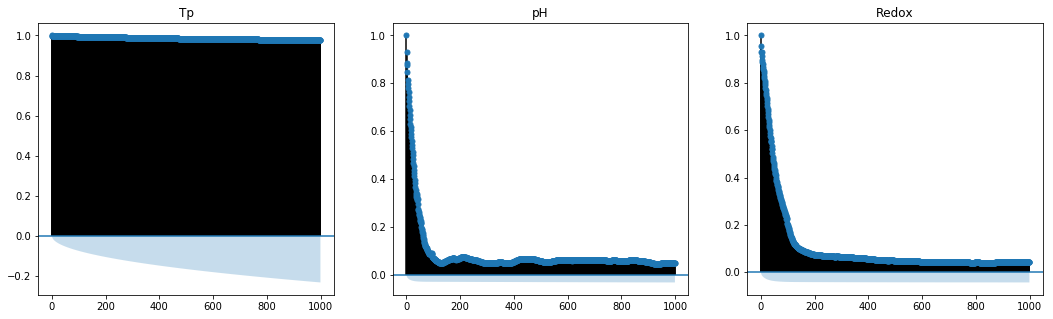

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

plot_acf(Tp, ax=ax1, lags = range(0,1000))
ax1.set_title('Tp')

plot_acf(pH, ax=ax2, lags = range(0, 1000))
ax2.set_title('pH')

plot_acf(Redox, ax=ax3, lags = range(0, 1000))     # note that max lags is 35
ax3.set_title('Redox')

plt.show()